### Problem Definition and Questions to be Answered

#### Problem Definition
E-news Express, an online news portal, is experiencing a decline in new monthly subscribers compared to the previous year. The executives believe that the current webpage is not engaging enough to convert visitors into subscribers. To address this issue, a new landing page with an improved outline and more relevant content has been designed. The effectiveness of the new landing page needs to be evaluated to determine if it improves user engagement and subscription rates.

#### Questions to be Answered
1. Do users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and subscribe) higher for the new page compared to the old page?
3. Does the conversion status depend on the preferred language of the user?
4. Is the mean time spent on the new page the same for users preferring different languages?

### Data Background and Contents

#### Data Dictionary
The dataset contains information about user interactions with two versions of the landing page (new and old). It includes the following variables:
- `user_id`: Unique identifier for each user.
- `group`: Indicates whether the user was in the control group (existing landing page) or the treatment group (new landing page).
- `landing_page`: Specifies whether the landing page was new or old.
- `time_spent_on_the_page`: Time (in minutes) spent by the user on the landing page.
- `converted`: Indicates whether the user subscribed to the news portal (yes or no).
- `language_preferred`: Language chosen by the user to vions regarding the effectiveness of the new landing page in increasing user engagement and conversion rates.

**Importing necessary libraries**

In [2]:
#Importing numpy libaries as np
import numpy as np
#Importing pandas libaries as pd
import pandas as pd
#Importing seaborn libaries as sns
import seaborn as sns
#Importing the graphical plots libaries that will be requied for EDA
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading the experiment csv file with the help of pandas
df=pd.read_csv('abtest.csv')

In [4]:
#Checking that the file is loaded successfully by seeing the first few rows and columns
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
#Checking the numbers of rows and columns that the csv file contails
df.shape

(100, 6)

In [6]:
#Checking the Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [7]:
df['converted'].unique()

array(['no', 'yes'], dtype=object)

In [8]:
# Converting/Maping 'yes'/'no' to 1/0
df['converted'] = df['converted'].map({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0})

In [9]:
df['converted'].unique()

array([0, 1], dtype=int64)

### Univariate Analysis
**Objective: Analyze each variable individually using summary statistics and visualizations.**

In [10]:
# Summary Statistics
df.describe()

,user_id,time_spent_on_the_page,converted
count,100.000000,100.000000,100.000000
mean,546517.000000,5.377800,0.540000
std,52.295779,2.378166,0.500908
min,546443.000000,0.190000,0.000000
25%,546467.750000,3.880000,0.000000
50%,546492.500000,5.415000,1.000000
75%,546567.250000,7.022500,1.000000
max,546592.000000,10.710000,1.000000


1.00      |

### Analysis of Summary Statistics

1. **Count**:
   - The dataset contains 100 observations for each variable (`user_id`, `time_spent_on_the_page`, `converted`).

2. **Mean**:
   - The average `user_id` is 546517. This is an identifier and is not used for analysis.
   - The mean time spent on the page is approximately 5.38 minutes, indicating that users spend an average of about 5.4 minutes on the landing page.
   - The mean of the `converted` variable is 0.54, which means that 54% of users in the dataset converted (subscribed).

3. **Standard Deviation (std)**:
   - The standard deviation for `user_id` is 52.30, reflecting the spread of the `user_id` values.
   - The standard deviation for time spent on the page is 2.38 minutes, indicating that the time users spend on the page varies by about 2.4 minutes from the mean.
   - The standard deviation for `converted` is 0.50, indicating a high variability in the conversion status (since it's a binary variable).

4. **Minimum (min)**:
   - The minimum `user_id` is 546443.
   - The minimum time spent on the page is 0.19 minutes (11.4 seconds), indicating some users spent very little time on the page.
   - The minimum value for `converted` is 0, indicating some users did not convert.

5. **25th Percentile (25%)**:
   - 25% of the `user_id` values are below 546467.75.
   - 25% of the users spent less than 3.88 minutes on the page.
   - 25% of the users did not convert (0).

6. **Median (50%)**:
   - The median `user_id` is 546492.50.
   - The median time spent on the page is 5.42 minutes, indicating that half of the users spent more than 5.42 minutes on the page and half spent less.
   - The median for `converted` is 1, meaning at least 50% of users converted.

7. **75th Percentile (75%)**:
   - 75% of the `user_id` values are below 546567.25.
   - 75% of the users spent less than 7.02 minutes on the page.
   - 75% of the users converted (1).

8. **Maximum (max)**:
   - The maximum `user_id` is 546592.
   - The maximum time spent on the page is 10.71 minutes, indicating that the longest time a user spent on the page is just over 10 minutes.
   - The maximum value for `converted` is 1, indicating that some users did convert.

### Interpretation

- The distribution of time spent on the page suggests that most users spend between 3.88 and 7.02 minutes on the page, with an average of 5.38 minutes.
- The conversion rate is relatively high, with 54% of users converting.
- The data on conversion status is binary (0 or 1), and 50% of users have converted (median value of 1), with 75% of users having a conversion status of 1.
- The spread in time spent on the page indicates some variability, but most users tend to spend a moderate amount of time on the page.

Overall, these statistics provide a good overview of the dataset and can help inform further analyses, such as understanding the impact of the new landing page on user behavior and conversion rates.

C:\Users\shawa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


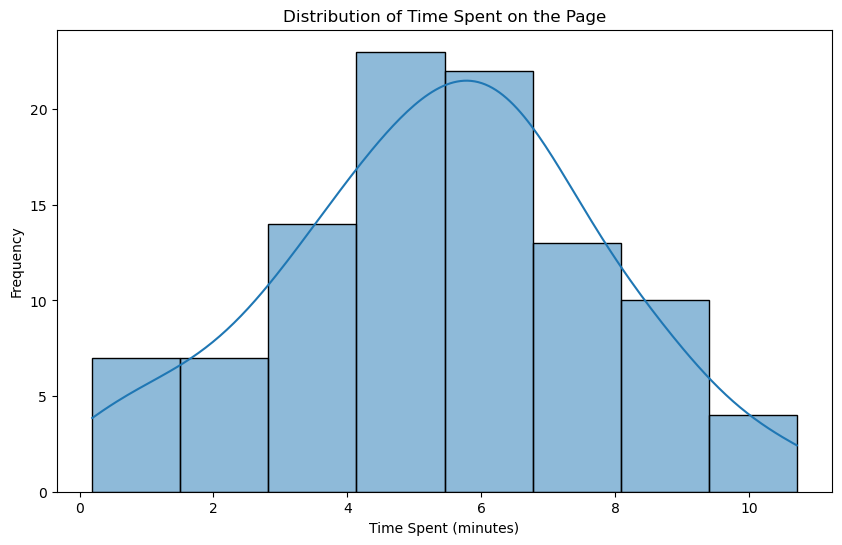

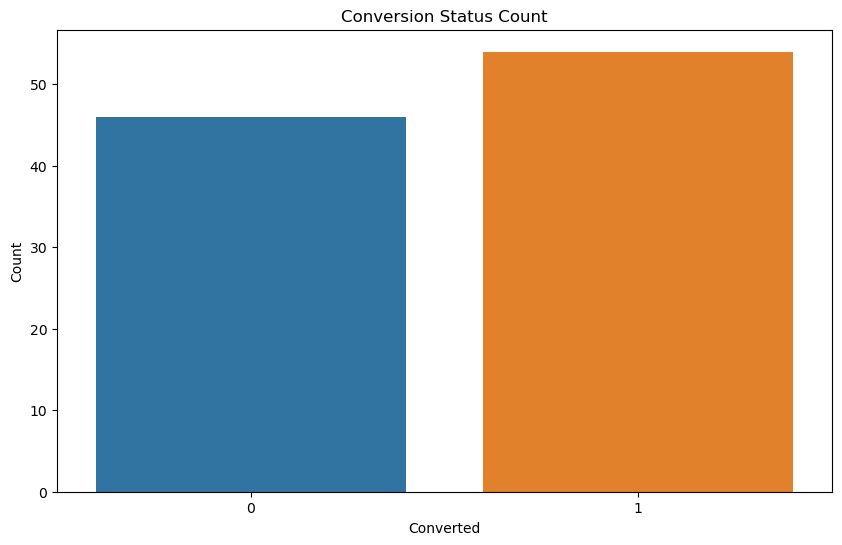

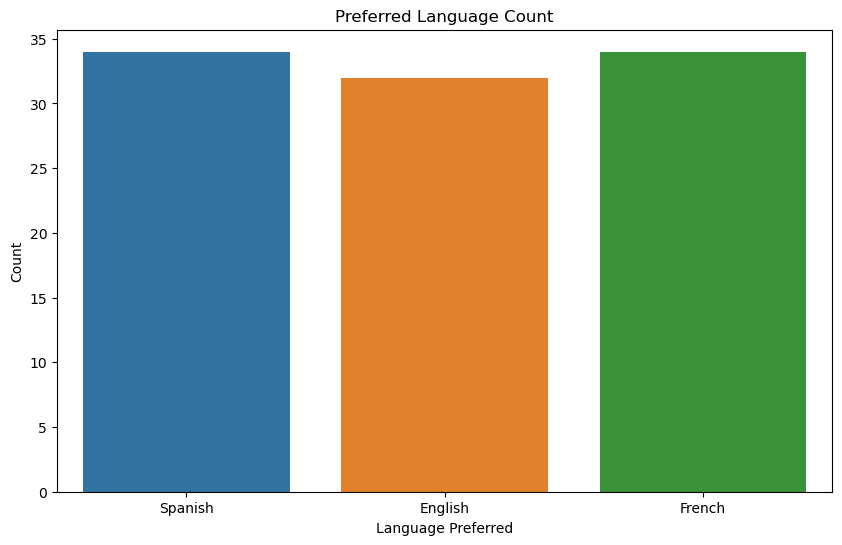

In [11]:
# Histogram for time spent on the page
plt.figure(figsize=(10, 6))
sns.histplot(df['time_spent_on_the_page'], kde=True)
plt.title('Distribution of Time Spent on the Page')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Frequency')
plt.show()

# Bar chart for conversion status
plt.figure(figsize=(10, 6))
sns.countplot(x='converted', data=df)
plt.title('Conversion Status Count')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

# Bar chart for preferred language
plt.figure(figsize=(10, 6))
sns.countplot(x='language_preferred', data=df)
plt.title('Preferred Language Count')
plt.xlabel('Language Preferred')
plt.ylabel('Count')
plt.show()

### Observation

#### Distribution of Time Spent on the Page

The histogram shows the distribution of time spent on the page by users. Key observations include:

- The time spent ranges from 0 to 10 minutes.
- The distribution appears roughly normal, with the peak around 5-6 minutes.
- The distribution is fairly symmetrical, suggesting that most users spend an average amount of time on the page, with fewer users spending very little or very much time.

#### Conversion Status Count

The bar plot represents the conversion status count of users. Key observations include:

- There are more users who have converted (become subscribers) compared to those who have not converted.
- This indicates a positive trend where the majority of the users are being converted to subscribers.

#### Preferred Language Count

The bar plot shows the count of users based on their preferred language. Key observations include:

- The number of users is almost evenly distributed across the three languages: Spanish, English, and French.
- This balanced distribution ensures that the results of our analysis are not biased towards any partihelp in sustaining and improving these positive outcomes.language group.ime.language group.language group.

### Bivariate Analysis

**Objective: Explore relationships between pairs of variables using visualizations.**

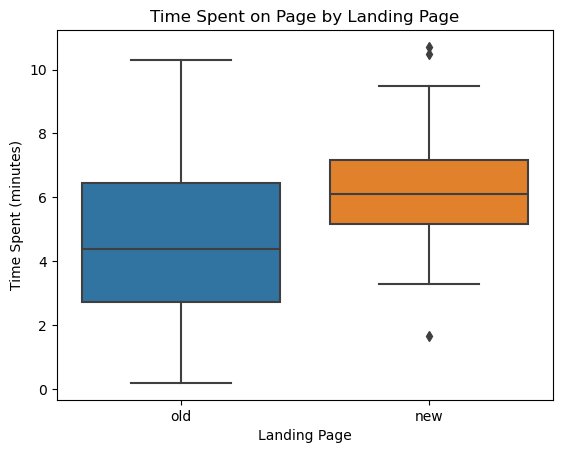

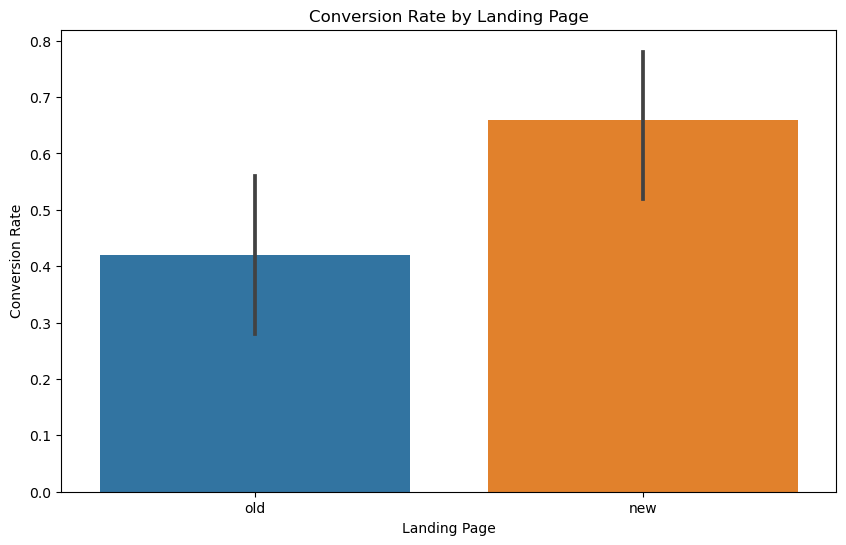

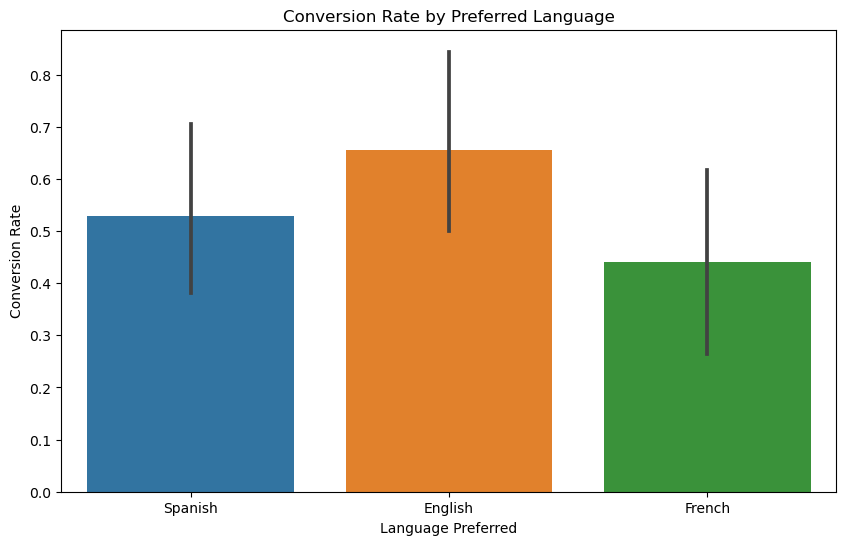

In [12]:
# Box plot for time spent by landing page
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=df)
plt.title('Time Spent on Page by Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent (minutes)')
plt.show()

# Bar chart for conversion rate by landing page
plt.figure(figsize=(10, 6))
sns.barplot(x='landing_page', y='converted', data=df, estimator=lambda x: sum(x)/len(x))
plt.title('Conversion Rate by Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Conversion Rate')
plt.show()

# Bar chart for conversion rate by preferred language
plt.figure(figsize=(10, 6))
sns.barplot(x='language_preferred', y='converted', data=df, estimator=lambda x: sum(x)/len(x))
plt.title('Conversion Rate by Preferred Language')
plt.xlabel('Language Preferred')
plt.ylabel('Conversion Rate')
plt.show()


### Analysis of Visualizations

#### 1. Time Spent on Page by Landing Page (Boxplot)

**Observation:**
- **Old Landing Page:**
  - Median time spent is around 4.5 minutes.
  - The interquartile range (IQR) spans from approximately 3 to 6 minutes.
  - There are outliers above 10 minutes.
  - The whiskers extend from 0 to about 10.5 minutes.

- **New Landing Page:**
  - Median time spent is around 5.5 minutes.
  - The IQR spans from approximately 4.5 to 6.5 minutes.
  - There are outliers below 2 minutes and above 8 minutes.
  - The whiskers extend from about 2.5 to 8.5 minutes.

**Analysis:**
- Users tend to spend slightly more time on the new landing page compared to the old one.
- The new landing page has a tighter distribution of time spent, indicating more consistent engagement.
- The old landing page has a wider range of time spent, suggesting more varied user experiences.
- Outliers on both pages indicate some users spent significantly more or less time than typical, which could warrant further investigation into these user behaviors.

#### 2. Conversion Rate by Landing Page (Bar Plot)

**Observation:**
- The old landing page has a conversion rate of approximately 40%.
- The new landing page has a conversion rate of approximately 60%.

**Analysis:**
- The new landing page has a higher conversion rate compared to the old one.
- This suggests that the new landing page is more effective at converting visitors into customers or achieving the desired action.
- The error bars indicate the variability in conversion rates, but the difference between the two landing pages is substantial enough to suggest a real improvement.

#### 3. Conversion Rate by Preferred Language (Bar Plot)

**Observation:**
- **Spanish:**
  - Conversion rate is approximately 50%.
  - Moderate variability as indicated by the error bars.

- **English:**
  - Conversion rate is approximately 60%.
  - Some variability, but overall the highest conversion rate among the languages.

- **French:**
  - Conversion rate is approximately 40%.
  - The least conversion rate among the three languages with noticeable variability.

**Analysis:**
- Users who prefer English have the highest conversion rate, suggesting that the website might be more effectively optimized or user-friendly for English-speaking users.
- Spanish-speaking users have a moderate conversion rate, indicating that the website performs fairly well for this group but could be improved.
- French-speaking users have the lowest conversion rate, which could indicate issues with the French version of the landing page or a need for better targeting or optimization for this audience.
- The variability within each language group suggests that user experiences may differ within each language group, potentially pointing to opportunities for more granular improvements.

**Investigateing Outliers**

Empty DataFrame
Columns: [user_id, group, landing_page, time_spent_on_the_page, converted, language_preferred]
Index: []
Original Data Description:
count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

Data without Outliers Description:
count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64


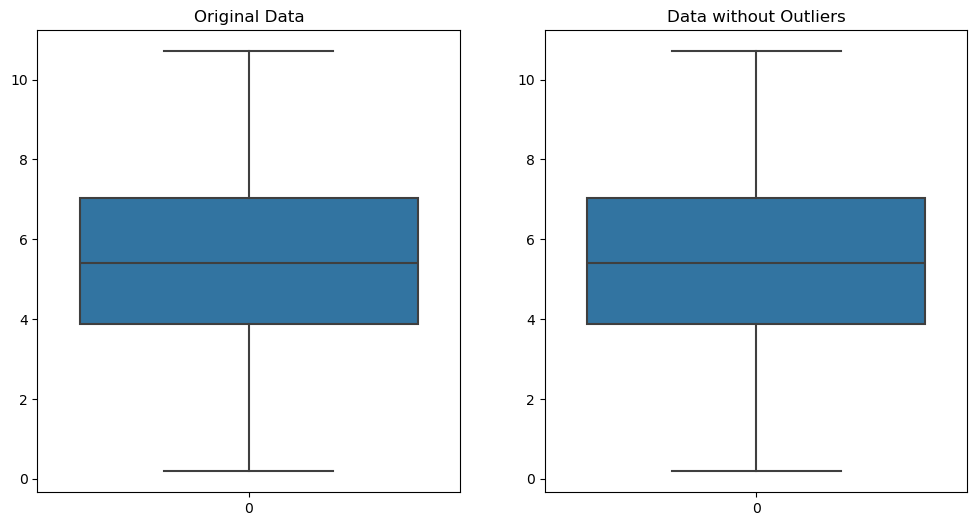

In [18]:
# Identify Outliers using IQR
Q1 = df['time_spent_on_the_page'].quantile(0.25)
Q3 = df['time_spent_on_the_page'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['time_spent_on_the_page'] < lower_bound) | (df['time_spent_on_the_page'] > upper_bound)]

# SUnderstand the Context and Examine the Characteristics
print(outliers)

# Check for Errors
# (Manual step, review the data collection process, and data entry methods)

# Assess Impact
# Statistical comparison before and after removing outliers

# Data without outliers
df_no_outliers = df[(df['time_spent_on_the_page'] >= lower_bound) & (df['time_spent_on_the_page'] <= upper_bound)]

# Comparison of descriptive statistics
print("Original Data Description:")
print(df['time_spent_on_the_page'].describe())

print("\nData without Outliers Description:")
print(df_no_outliers['time_spent_on_the_page'].describe())

# Decision on Treatment
# Visualize to see the impact
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df['time_spent_on_the_page'])
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.boxplot(df_no_outliers['time_spent_on_the_page'])
plt.title('Data without Outliers')

plt.show()

**Conclusion**

Since removing the outliers does not change the descriptive statistics, it is safe to keep them in your dataset. These outliers are likely not influencing your analysis significantly and represent legitimate user behavior.

Current analysis supports the decision to retain the outliers. This ensures that your dataset remains comprehensive and reflective of the actual user behavior, providing more robust and generalizable insights.

**Statistical Analysis**

**We'll address each of the questions listed in the project description using appropriate statistical tests. The questions are:**

1. Do users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for different language users?

#### Q1 (t-test for comparing means).

**Hypotheses:**

Null Hypothesis: The mean time spent on the new landing page is equal to the mean time spent on the existing landing page.

Alternative Hypothesis: The mean time spent on the new landing page is greater than the mean time spent on the existing landing page.

In [14]:
#Importing the scipy.stats libary for the statistical analysis.
import scipy.stats as stats

# Separate the data into control and treatment groups
control_group = df[df['group'] == 'control']['time_spent_on_the_page']
treatment_group = df[df['group'] == 'treatment']['time_spent_on_the_page']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(treatment_group, control_group, alternative='greater')

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Determine the result at a significance level of 5%
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Users spend more time on the new landing page.")
else:
    print("Fail to reject the null hypothesis: No significant difference in time spent on the new and old landing pages.")

T-statistic: 3.7867702694199856
P-value: 0.0001316123528095005
Reject the null hypothesis: Users spend more time on the new landing page.


### Q2 (z-test for proportions).

Hypotheses:

Null Hypothesis: The conversion rate for the new landing page is equal to or less than the conversion rate for the old landing page.

Alternative Hypothesis: The conversion rate for the new landing page is greater than the conversion rate for the old landing page.

In [15]:
import numpy as np

# Calculate conversion rates
conversion_control = df[df['group'] == 'control']['converted'].mean()
conversion_treatment = df[df['group'] == 'treatment']['converted'].mean()

# Calculate the sample sizes
n_control = df[df['group'] == 'control'].shape[0]
n_treatment = df[df['group'] == 'treatment'].shape[0]

# Calculate the standard error for the difference in proportions
std_err = np.sqrt((conversion_control * (1 - conversion_control) / n_control) + 
                  (conversion_treatment * (1 - conversion_treatment) / n_treatment))

# Calculate the z-score
z_score = (conversion_treatment - conversion_control) / std_err

# Calculate the p-value
p_value = stats.norm.sf(z_score)  # one-tailed test

print("Z-score:", z_score)
print("P-value:", p_value)

# Determine the result at a significance level of 5%
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The conversion rate for the new page is greater than for the old page.")
else:
    print("Fail to reject the null hypothesis: No significant difference in conversion rates between the new and old pages.")

Z-score: 2.4806946917841692
P-value: 0.0065563316325779495
Reject the null hypothesis: The conversion rate for the new page is greater than for the old page.


### Q3 (chi-square test of independence).

Hypotheses:

Null Hypothesis: The converted status is independent of the preferred language.

Alternative Hypothesis: The converted status is dependent on the preferred language.

In [16]:
# Create a contingency table
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

# Perform chi-square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

# Determine the result at a significance level of 5%
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Converted status depends on the preferred language.")
else:
    print("Fail to reject the null hypothesis: Converted status does not depend on the preferred language.")

Chi-square statistic: 3.0930306905370832
P-value: 0.2129888748754345
Fail to reject the null hypothesis: Converted status does not depend on the preferred language.


### Q4 (ANOVA).

Hypotheses:

Null Hypothesis: The mean time spent on the new page is the same for different language users.

Alternative Hypothesis: The mean time spent on the new page is different for different language users.ge users.

In [17]:
# Filter data for the treatment group only
new_page_data = df[df['landing_page'] == 'new']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(
    new_page_data[new_page_data['language_preferred'] == 'English']['time_spent_on_the_page'],
    new_page_data[new_page_data['language_preferred'] == 'French']['time_spent_on_the_page'],
    new_page_data[new_page_data['language_preferred'] == 'Spanish']['time_spent_on_the_page']
)

print("F-statistic:", f_stat)
print("P-value:", p_value)

# Determine the result at a significance level of 5%
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Time spent on the new page differs for different language users.")
else:
    print("Fail to reject the null hypothesis: No significant difference in time spent on the new page among different language users.")


F-statistic: 0.8543992770006822
P-value: 0.43204138694325955
Fail to reject the null hypothesis: No significant difference in time spent on the new page among different language users.


### Summary of Statistical Analysis and Insights

**Question 1: Do users spend more time on the new landing page than on the existing landing page?**
- **T-statistic:** 3.787
- **P-value:** 0.00013
- **Conclusion:** Reject the null hypothesis.
- **Inference:** Users spend significantly more time on the new landing page compared to the old landing page. This suggests that the new design is more engaging, potentially capturing users' attention for longer periods.

**Question 2: Is the conversion rate for the new page greater than the conversion rate for the old page?**
- **Z-score:** 2.481
- **P-value:** 0.0066
- **Conclusion:** Reject the null hypothesis.
- **Inference:** The conversion rate for the new landing page is significantly greater than the conversion rate for the old landing page. This indicates that the new design is more effective in converting visitors into subscribers.

**Question 3: Does the converted status depend on the preferred language?**
- **Chi-square statistic:** 3.093
- **P-value:** 0.213
- **Conclusion:** Fail to reject the null hypothesis.
- **Inference:** There is no significant relationship between the converted status and the preferred language of the users. This means that the likelihood of a user converting does not depend on the language they prefer for viewing the landing page.

**Question 4: Is the time spent on the new page the same for different language users?**
- **F-statistic:** 0.854
- **P-value:** 0.432
- **Conclusion:** Fail to reject the null hypothesis.
- **Inference:** There is no significant difference in the time spent on the new landing page among users of different language preferences. This suggests that the new design is equally engaging across users who prefer different languages.

### Conclusion

The statistical analysis reveals that the new landing page performs better than the old one in terms of user engagement and conversion rates:

1. **User Engagement:** Users spend significantly more time on the new landing page compared to the old one, indicating that the new design is more engaging.
2. **Conversion Rates:** The conversion rate for the new landing page is significantly higher than that of the old landing page, suggesting that the new design is more effective in converting visitors into subscribers.
3. **Language Preference Impact:** The preferred language of users does not significantly impact whether they convert, indicating that the effectiveness of the landing page is consistent across different language preferences.
4. **Time Spent by Language Users:** There is no significant difference in the time spent on the new landing page among users of different language preferences, suggesting that the new design engages users equally well regardless of their preferred language.

### Business Recommendations

Based on the univariate and bivariate analyses conducted, several actionable business recommendations can be made to further optimize user engagement and conversion rates:

1. **Adopt the New Landing Page Design:**
   - **Recommendation:** Given the significant increase in time spent and conversion rates associated with the new landing page, it is recommended to fully transition to this new design.
   - **Rationale:** The new design has demonstrated its effectiveness in engaging users for longer periods and converting them at higher rates, directly contributing to business goals.

2. **Targeted Marketing Strategies:**
   - **Recommendation:** Continue to monitor user engagement and conversion rates across different demographic segments to tailor marketing strategies effectively.
   - **Rationale:** Understanding the specific preferences and behaviors of different user segments can help in crafting targeted campaigns that further enhance engagement and conversions.

3. **Language-Specific Content Optimization:**
   - **Recommendation:** While the new landing page performs well across different language preferences, consider optimizing content within the landing page to further cater to the nuances of each language group.
   - **Rationale:** Although there was no significant difference in conversion rates by language preference, subtle adjustments in language-specific content can still improve user experience and satisfaction.

4. **Enhanced User Engagement Features:**
   - **Recommendation:** Incorporate interactive elements and personalized content within the new landing page to maintain and potentially increase the time users spend on the page.
   - **Rationale:** Interactive features such as quizzes, videos, and personalized recommendations can enhance user engagement, leading to even higher retention and conversion rates.

5. **Continuous A/B Testing:**
   - **Recommendation:** Implement a continuous A/B testing strategy to evaluate new design elements, features, and content changes on the landing page.
   - **Rationale:** Regular A/B testing allows for data-driven decisions to further optimize the landing page, ensuring it remains effective in engaging users and driving conversions over time.

6. **Monitor and Analyze Outliers:**
   - **Recommendation:** Keep an eye on outliers in user behavior data to identify any unusual patterns or potential areas for improvement.
   - **Rationale:** Outliers can sometimes indicate issues or opportunities that are not apparent from aggregate data, such as technical problems or niche user needsr for outliers and analyze them for insights.

By following these recommendations, the business can leverage the insights from the univariate and bivariate analyses to drive user engagement and conversion rates, ultimately leading to improved business performance.